# Clustering PM2.5 Data of Beijing using KMeans

In [1]:
import KMeansUtility
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Importing data 
- Dataset: PM2.5 Data of Beijing, China https://www.kaggle.com/uciml/pm25-data-for-five-chinese-cities

In [2]:
# Loading the data into pandas dataframe
data_url = "https://raw.githubusercontent.com/nishil70/ML-Probably-Interesting-Data/master/data/BeijingPM20100101_20151231.csv"
df = pd.read_csv(data_url)

#### Dropping null value rows

In [3]:
df = df.dropna()

## Data Exploration using pandas, seaborn
- The main aim here is to get to know data and its distribution

In [4]:
df.shape

(19062, 18)

In [5]:
df.dtypes

No                   int64
year                 int64
month                int64
day                  int64
hour                 int64
season               int64
PM_Dongsi          float64
PM_Dongsihuan      float64
PM_Nongzhanguan    float64
PM_US Post         float64
DEWP               float64
HUMI               float64
PRES               float64
TEMP               float64
cbwd                object
Iws                float64
precipitation      float64
Iprec              float64
dtype: object

In [6]:
df.describe()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000
mean,38690.029693,2013.925244,6.402476,15.419736,11.476026,2.347865,86.627321,92.264033,85.659532,90.099675,2.361924,51.362344,1015.351957,14.062900,21.019979,0.051642,0.215764
std,6327.149539,0.761684,3.316618,8.723040,6.955963,1.122671,82.953394,87.706631,83.510634,86.151636,14.266730,25.520666,10.214528,11.527468,46.390482,0.634109,2.149536
min,27825.000000,2013.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,2.000000,-40.000000,2.000000,991.000000,-12.000000,0.450000,0.000000,0.000000
25%,33371.250000,2013.000000,4.000000,8.000000,5.000000,1.000000,25.000000,28.000000,25.000000,27.000000,-10.000000,29.000000,1007.000000,4.000000,1.790000,0.000000,0.000000
50%,38606.500000,2014.000000,6.000000,15.000000,11.000000,2.000000,64.000000,68.000000,62.000000,66.000000,3.000000,52.000000,1015.000000,15.000000,4.920000,0.000000,0.000000
75%,43937.750000,2015.000000,9.000000,23.000000,18.000000,3.000000,121.000000,128.000000,117.000000,122.000000,16.000000,73.000000,1023.000000,24.000000,19.670000,0.000000,0.000000
max,52583.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,737.000000,672.000000,844.000000,722.000000,26.000000,100.000000,1041.000000,40.000000,490.380000,30.400000,51.100000


### Visualizing Data with Pair Plot
- Main aim here is to identify how different features co-relate with each other
- As seen from charts 'HUMI' and 'Iws' have good linear relationship which can possibly be exploited using KMeans

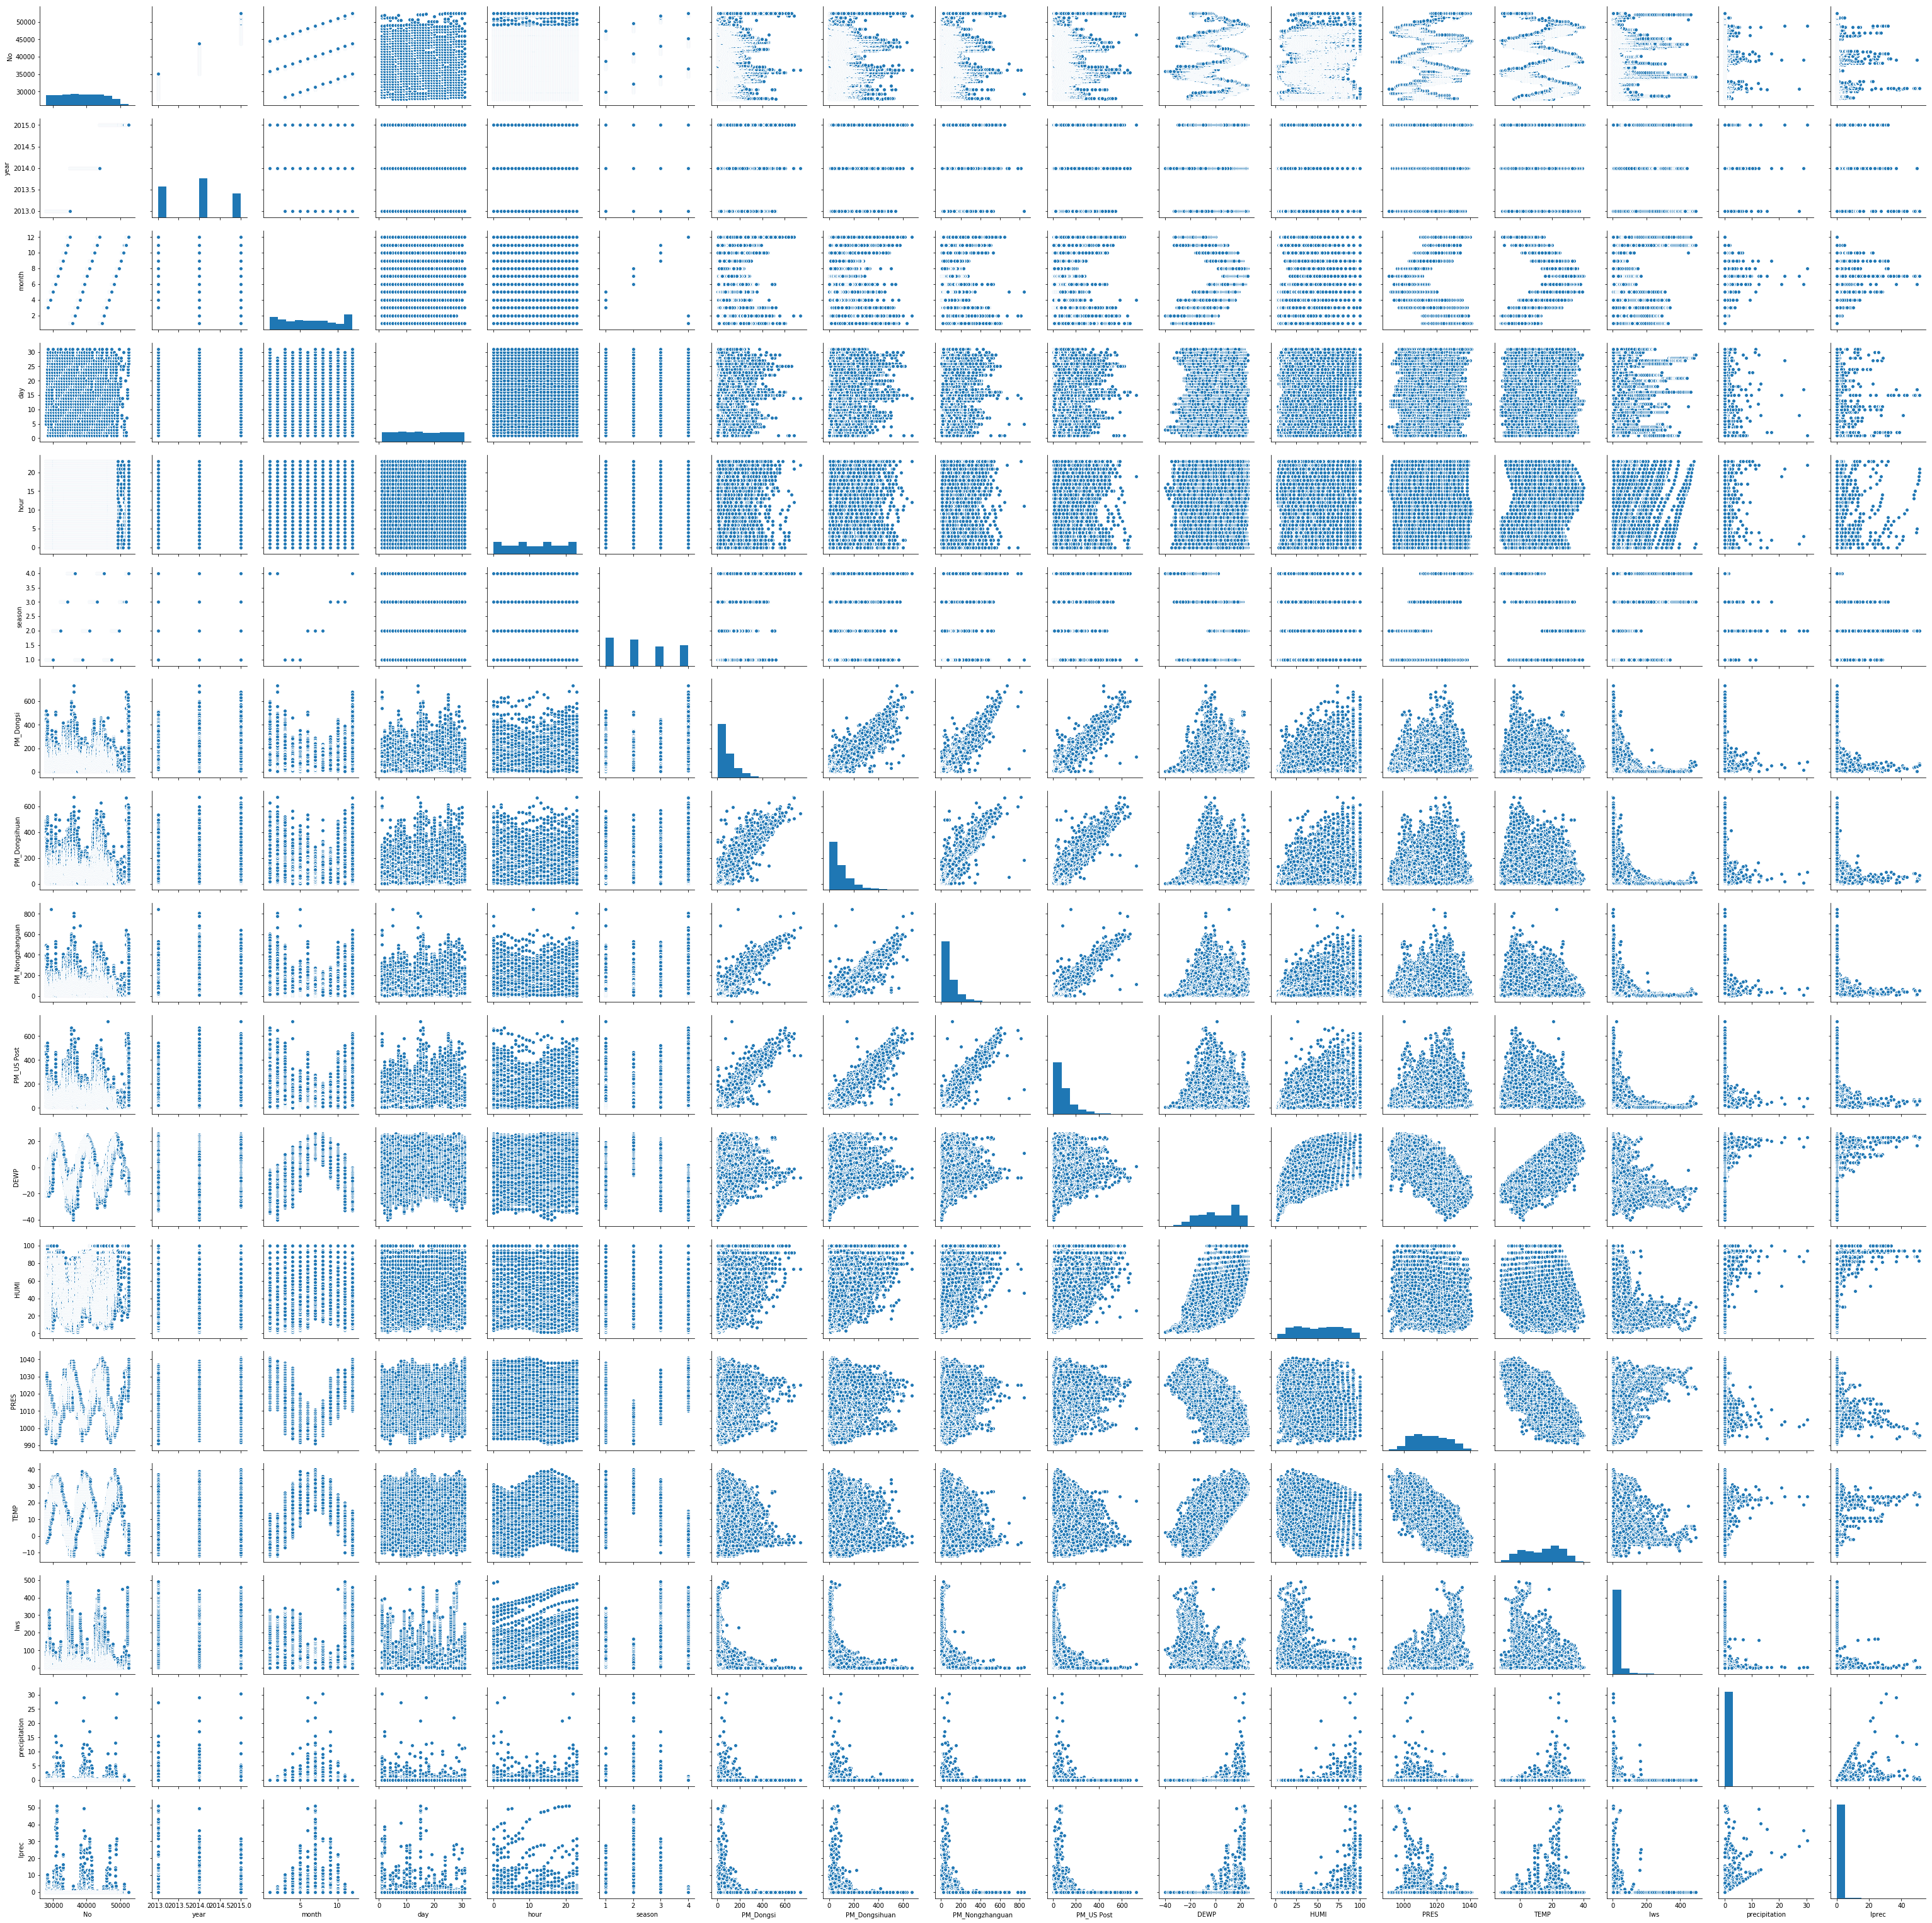

In [7]:
sns.pairplot(df)

### Plotting Albumin vs Total_Protiens which we will try to map using KMeans

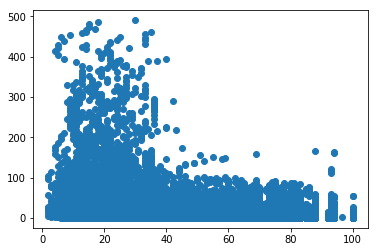

In [8]:
plt.scatter(df['HUMI'].values, df['Iws'].values)
plt.show()

## Data Preparation
- This dataset doesn't really have outliers, so that step was not required

In [9]:
df.shape
data = df[['HUMI','Iws']]

#### Plotting again after Removing the outliers

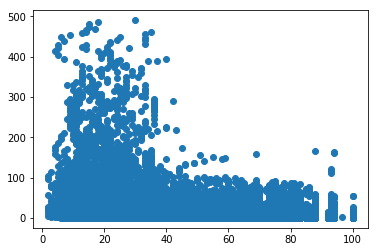

In [10]:
plt.scatter(data['HUMI'].values, data['Iws'].values)
plt.show()

In [11]:
data = data.values

# KMeans demonstration with K = 3

In [12]:
k = 3
maxIter = 10000

In [19]:
initCentroids = KMeansUtility.randomCentroids(k,data)

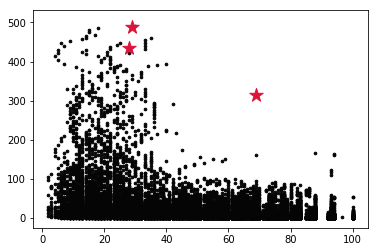

In [20]:
KMeansUtility.plotCentroids(initCentroids,data)

In [21]:
clusters, centroids = KMeansUtility.KMeans(k,data,maxIter)

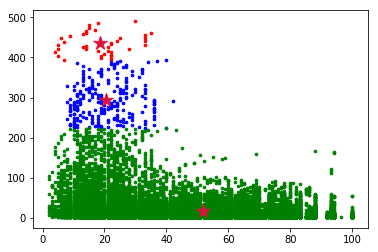

In [22]:
KMeansUtility.printClusters(k,data,clusters,centroids)

## Results:
- KMeans is working as expected
- K = 3 fits fine for this data distribution